In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Params import *
from Utils import *
from Abstraction import SymbolicAbstraction
from Controller import SymbolicController

In [ ]:
print(
    coord2state(np.array([1, 1, 1]), p_x),
)


[1 1 1] [0 0 0] [    1   100 10000]
1


array([100, 100,  30])

In [2]:
myAbs = SymbolicAbstraction(f, Jf_x, Jf_w)
myAbs.Load("SymbolicAbstraction.csv")

Symbolic model 'g' loaded from 'SymbolicAbstraction.csv'


In [3]:
Control = SymbolicController(myAbs)
V_result, h2_result = Control.Start()


Iteration 1

Iteration 2

Iteration 3

Iteration 4

Iteration 5

Iteration 6

Iteration 7

Iteration 8

Iteration 9

Iteration 10

Iteration 11

Iteration 12

Iteration 13

Iteration 14

Iteration 15

Iteration 16

Iteration 17

Iteration 18

Iteration 19

Iteration 20

Iteration 21

Iteration 22


KeyboardInterrupt: 

[8 4 0]
[0 8 0]
[8 0 0]
[1 4 0]


C:\Users\UM6P\AppData\Local\Temp\ipykernel_19628\1286244034.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


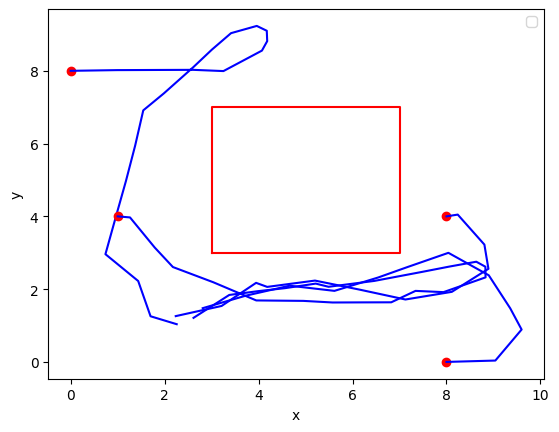

In [ ]:
import random
Lab_xi = Control.Lab_xi

plt.figure()

for i in range(5):
    x = np.array([random.randint(0, 9), random.randint(0, 9), 0])


    if x[0] >= R4[0, 0] and x[0] <= R4[0, 1] and x[1] >= R4[1, 0] and x[1] <= R4[1, 1]:
        continue

    plt.plot(x[0], x[1], 'ro')

    print(x)

    psi = I_s
    z = x  
    Tx = [x]

    try: 
            
        for i in range(100):
            psi = h1(psi, q(x), Lab_xi)

            if psi == F_s[0]:
                break

            u = myAbs.val_u[:, int(h2_result[psi - 1, q(x)]) - 1]
            w = bound_w[:, 0] + np.random.rand(3) * (bound_w[:, 1] - bound_w[:, 0])

            x = f(x, u, w)
            z = f(z, u, w)

            if x[2] > np.pi:
                x[2] -= 2 * np.pi
            elif x[2] < -np.pi:
                x[2] += 2 * np.pi
            
            Tx.append(z)

        plt.plot([x[0] for x in Tx], [x[1] for x in Tx], 'b-')
    
    except: 
        pass



"""plt.plot(R1[0, [0, 1, 1, 0, 0]], R1[1, [0, 0, 1, 1, 0]], 'y-')
plt.plot(R2[0, [0, 1, 1, 0, 0]], R2[1, [0, 0, 1, 1, 0]], 'y-')
plt.plot(R3[0, [0, 1, 1, 0, 0]], R3[1, [0, 0, 1, 1, 0]], 'g-', label='R3')"""
plt.plot(R4[0, [0, 1, 1, 0, 0]], R4[1, [0, 0, 1, 1, 0]], 'r-')

"""for i, region in enumerate([R1, R2, R3, R4]):
    plt.text(region[0, 0], region[1, 0], f"R{i+1}", color='r')"""


plt.xlabel('x')
plt.ylabel('y')
plt.legend()